## Imports and data sources

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf #yahoo datasource
from datasets import load_dataset #transcript data

/opt/homebrew/Cellar/jupyterlab/4.3.5/libexec/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("BUILDERlym/STRUX-Transcripts")
ds

DatasetDict({
    train: Dataset({
        features: ['ticker', 'date', 'participants', 'prepared_remarks', 'questions_and_answers'],
        num_rows: 1100
    })
    test: Dataset({
        features: ['ticker', 'date', 'participants', 'prepared_remarks', 'questions_and_answers'],
        num_rows: 587
    })
    full: Dataset({
        features: ['ticker', 'date', 'participants', 'prepared_remarks', 'questions_and_answers'],
        num_rows: 11411
    })
})

The dataset was available in 3 formats: test data, train data and full (complete) dataset. To learn about our data and get relevant information, we extracted the full dataset

In [3]:
full_ds = ds["full"]
df_full = full_ds.to_pandas()
df_full.tail(10)

,ticker,date,participants,prepared_remarks,questions_and_answers
11401,GLW,2021-04-27,[{'description': 'Vice President of Investor R...,"[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['Thank you. O..."
11402,CVLG,2021-01-26,"[{'description': 'Chief Financial Officer, Sec...","[{'name': 'Operator', 'speech': ['Everyone. We...","[{'name': 'Operator', 'speech': ['[Operator in..."
11403,CVLG,2019-07-25,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['Thank you. A..."
11404,CVLG,2020-01-24,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['[Operator In..."
11405,CVLG,2021-10-21,[{'description': 'Co-President & Chief Adminis...,"[{'name': 'Operator', 'speech': ['[Operator in...","[{'name': 'Operator', 'speech': ['Thank you. [..."
11406,CVLG,2022-07-26,"[{'description': 'President', 'name': 'Joey Ho...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in..."
11407,CVLG,2019-04-26,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['Thank you. A..."
11408,CVLG,2019-01-24,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['Thank you. A..."
11409,CVLG,2022-01-27,[{'description': 'Co-President and Chief Admin...,"[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in..."
11410,CVLG,2021-04-27,[{'description': 'Co-President and Chief Admin...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['[Operator in..."


In [4]:
# Saving it as a pickle file to load is faster next time:
# Since loading it the first time from the dataset library took a lot of time
df_full.to_pickle("strux_full.pkl")

In [5]:
df_full = pd.read_pickle("strux_full.pkl")
df_full

,ticker,date,participants,prepared_remarks,questions_and_answers
0,CTAS,2020-09-23,"[{'description': 'Vice President, Treasurer & ...","[{'name': 'Operator', 'speech': ['Good day eve...","[{'name': 'Operator', 'speech': ['[Operator In..."
1,CTAS,2021-03-17,[{'description': 'Vice President-Treasurer and...,"[{'name': 'Operator', 'speech': ['Good day, ev...","[{'name': 'Operator', 'speech': ['Thank you, s..."
2,CTAS,2021-07-15,"[{'description': 'Vice President, Treasurer an...","[{'name': 'Operator', 'speech': ['Good day eve...","[{'name': 'Operator', 'speech': ['[Operator In..."
3,CTAS,2018-03-22,"[{'description': '-Senior Vice President, Fina...","[{'name': 'Operator', 'speech': ['Good day, ev...","[{'name': 'Operator', 'speech': ['Thank you. [..."
4,CTAS,2019-12-17,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Good day, we...","[{'name': 'Operator', 'speech': ['[Operator In..."
...,...,...,...,...,...
11406,CVLG,2022-07-26,"[{'description': 'President', 'name': 'Joey Ho...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in..."
11407,CVLG,2019-04-26,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['Thank you. A..."
11408,CVLG,2019-01-24,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['Thank you. A..."
11409,CVLG,2022-01-27,[{'description': 'Co-President and Chief Admin...,"[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in..."


#### yfinance stock data extraction
Creating a list of all the tickers (companies) present in the STRUX dataset, so that we can extract their respective stock data from yfinance. 
This was done because yfinance did not have a 'complete dataset'. A list of tickers had to be given to extract data for only those tickers.

In [6]:
all_tickers = df_full.ticker.unique()
all_tickers

array(['CTAS', 'WELL', 'VZ', 'CYRX', 'CTMX', 'AFCG', 'AMZN', 'CELH',
       'FARM', 'AEYE', 'CMCO', 'CNP', 'ECPG', 'RCL', 'AUDC', 'CAT', 'TFC',
       'AAPL', 'PANW', 'CVGI', 'ARRY', 'PM', 'KHC', 'TEL', 'DENN', 'CGC',
       'CMCSA', 'CSWI', 'CLPT', 'DOMO', 'AXTI', 'DADA', 'ANET', 'BRO',
       'CAH', 'AHCO', 'EWBC', 'CRMT', 'AGYS', 'FSLR', 'CRBP', 'CACC',
       'BMRN', 'BNGO', 'PFE', 'TFX', 'APTV', 'AMSF', 'AAL', 'CDW', 'ADEA',
       'MAR', 'FITB', 'UBER', 'CCEP', 'SPGI', 'ATRO', 'ALLE', 'SYK',
       'MMC', 'BLDP', 'DXCM', 'EBC', 'CHUY', 'PEP', 'SNPS', 'PLD', 'GOOG',
       'MMM', 'ANIP', 'ADN', 'EMN', 'ATRA', 'NXPI', 'PCG', 'BF.B', 'DIBS',
       'AMT', 'BLNK', 'ADI', 'CAR', 'MAA', 'AOUT', 'CNSL', 'ARWR', 'CRNT',
       'HWM', 'DKNG', 'MAS', 'MDB', 'FORM', 'AMPH', 'FTV', 'CAG', 'AVXL',
       'MGM', 'CNC', 'VLO', 'CAN', 'ANIK', 'UPS', 'EXTR', 'CVAC', 'CME',
       'CSTR', 'EMR', 'OKE', 'SYY', 'GILD', 'CRDO', 'SNA', 'EYE', 'DCPH',
       'BBSI', 'CDNA', 'MS', 'BIO', 'CLNE', 'EGBN',

In [7]:
# data extracted from the beginning (1960) till the most recent updation (2024)
all_tickers = list(all_tickers)
tickers = all_tickers
df = yf.download(tickers, start="1960-01-01", end="2024-12-31")
df.head()

/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/2153469210.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="1960-01-01", end="2024-12-31")
[*********************100%***********************]  858 of 858 completed

52 Failed downloads:
['AKTS', 'CASA', 'ALIM', 'FANH', 'CHUY', 'DSKE', 'WRK', 'CDXC', 'CONN', 'DCPH', 'CFB', 'AGRX', 'AY', 'CDMO', 'CPLP', 'DFS', 'JNPR', 'CUTR', 'BECN', 'CMRX', 'CBAY', 'SPLK', 'ACOR', 'CNSL', 'AMSWA', 'ATSG', 'AFMD', 'CARA', 'MRO', 'AWH', 'CSWI', 'ACCD', 'DCFC', 'PXD', 'FLT', 'CTLT', 'APTO', 'AZPN', 'BKCC', 'CSSE', 'CSTR', 'EGIO', 'AXNX', 'AXDX', 'ALPN', 'CNTG', 'BCOV', 'EVBG', 'ALTR', 'BRP', 'DADA']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 1960-01-01 -> 2024-12-31)')


Price      Adj Close                                                ...  \
Ticker          ACCD ACOR AFMD AGRX AKTS ALIM ALPN ALTR AMSWA APTO  ...   
Date                                                                ...   
1962-01-02       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-03       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-04       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-05       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-08       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   

Price      Volume                                           
Ticker        WRK WST  WY XEL      XOM XYL YUM ZBH  ZS ZTS  
Date                                                        
1962-01-02    NaN NaN NaN NaN   902400 NaN NaN NaN NaN NaN  
1962-01-03    NaN NaN NaN NaN  1200000 NaN NaN NaN NaN NaN  
1962-01-04    NaN NaN NaN NaN  1088000 NaN NaN NaN NaN NaN  
1962-01-05    NaN NaN NaN NaN  1222400 NaN NaN NaN NaN NaN  
1962-01-08    NaN NaN NaN NaN  1388800 NaN NaN NaN NaN NaN  

[5 rows x 4342 columns]

Since there wasn't a pre defined list by yahoo, We took the unique values from the strux dataset to get all tickers needed. This was our overall list of tickers. We passed that as an argument in the yf.download() while also having 2 separate lists for valid and invalid tickers. Valid tickers are the ones which download normally. Invalid ones are those which yahoo fails to download it's data for. So this array stores those tickers along with a code to handle what is the error why it didn't download them

<b> Downloads failed for some of our tickers due to one of these 2 errors: (Present in Logs below) </b>
<br />-> possibly delisted; no price data found  (1d 1960-01-01 -> 2024-12-31)
<br />-> possibly delisted; no timezone found

Out of 858 tickers, we extracted the data for 807 of them and 51 were invalid.
Since yahoo did not have data for these 51 companies, these companies would be excluded from our analysis

In [8]:
# Getting data for valid tickers:
valid_tickers = []
invalid_tickers = []

for t in all_tickers:
    try:
        data = yf.download(t, start="1960-01-01", end="2024-12-31")
        if not data.empty:
            valid_tickers.append(t)
        else:
            invalid_tickers.append(t)
    except Exception:
        invalid_tickers.append(t)

print(f"Valid: {len(valid_tickers)}, Invalid: {len(invalid_tickers)}")

/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/1219118890.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start="1960-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/1219118890.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start="1960-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/1219118890.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start="1960-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/1219118890.py:7: FutureWarning: YF.download() has changed argu

Valid: 806, Invalid: 52


In [9]:
df.columns

MultiIndex([('Adj Close',  'ACCD'),
            ('Adj Close',  'ACOR'),
            ('Adj Close',  'AFMD'),
            ('Adj Close',  'AGRX'),
            ('Adj Close',  'AKTS'),
            ('Adj Close',  'ALIM'),
            ('Adj Close',  'ALPN'),
            ('Adj Close',  'ALTR'),
            ('Adj Close', 'AMSWA'),
            ('Adj Close',  'APTO'),
            ...
            (   'Volume',   'WRK'),
            (   'Volume',   'WST'),
            (   'Volume',    'WY'),
            (   'Volume',   'XEL'),
            (   'Volume',   'XOM'),
            (   'Volume',   'XYL'),
            (   'Volume',   'YUM'),
            (   'Volume',   'ZBH'),
            (   'Volume',    'ZS'),
            (   'Volume',   'ZTS')],
           names=['Price', 'Ticker'], length=4342)

Once we had our final data, we stored it locally to our system using pickle for easy accessibility for our future tasks

In [10]:
df.to_pickle("all_stock_data.pkl")

In [11]:
stock_data = pd.read_pickle("all_stock_data.pkl")
stock_data

Price      Adj Close                                                ...  \
Ticker          ACCD ACOR AFMD AGRX AKTS ALIM ALPN ALTR AMSWA APTO  ...   
Date                                                                ...   
1962-01-02       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-03       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-04       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-05       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-08       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   
2024-12-23       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-24       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-26       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-27       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-30       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   

Price      Volume                                                      \
Ticker        WRK       WST         WY        XEL       XOM       XYL   
Date                                                                    
1962-01-02    NaN       NaN        NaN        NaN    902400       NaN   
1962-01-03    NaN       NaN        NaN        NaN   1200000       NaN   
1962-01-04    NaN       NaN        NaN        NaN   1088000       NaN   
1962-01-05    NaN       NaN        NaN        NaN   1222400       NaN   
1962-01-08    NaN       NaN        NaN        NaN   1388800       NaN   
...           ...       ...        ...        ...       ...       ...   
2024-12-23    NaN  374200.0  3546700.0  2535600.0  12285100  945800.0   
2024-12-24    NaN  203600.0  1780100.0   943900.0   7807000  379300.0   
2024-12-26    NaN  270800.0  1736500.0  1394900.0   9652400  575700.0   
2024-12-27    NaN  397800.0  2320500.0  2015000.0  11943900  552400.0   
2024-12-30    NaN  485600.0  2914700.0  2642900.0  11080800  586800.0   

Price                                                   
Ticker            YUM        ZBH         ZS        ZTS  
Date                                                    
1962-01-02        NaN        NaN        NaN        NaN  
1962-01-03        NaN        NaN        NaN        NaN  
1962-01-04        NaN        NaN        NaN        NaN  
1962-01-05        NaN        NaN        NaN        NaN  
1962-01-08        NaN        NaN        NaN        NaN  
...               ...        ...        ...        ...  
2024-12-23  1479100.0  1948300.0  1265600.0  2437800.0  
2024-12-24   533000.0   458600.0   654200.0  1023600.0  
2024-12-26  1040900.0  1277300.0   806500.0  2167200.0  
2024-12-27  1146300.0   743400.0  1256100.0  1800100.0  
2024-12-30  1144600.0  1532000.0  1032400.0  1531400.0  

[15857 rows x 4342 columns]

## Data Preprocessing: Stock Data

In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15857 entries, 1962-01-02 to 2024-12-30
Columns: 4342 entries, ('Adj Close', 'ACCD') to ('Volume', 'ZTS')
dtypes: float64(4320), int64(22)
memory usage: 525.4 MB


The columns are already in the required datatypes. So no further action was taken for this

In [13]:
stock_data

Price      Adj Close                                                ...  \
Ticker          ACCD ACOR AFMD AGRX AKTS ALIM ALPN ALTR AMSWA APTO  ...   
Date                                                                ...   
1962-01-02       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-03       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-04       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-05       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
1962-01-08       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   
2024-12-23       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-24       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-26       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-27       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   
2024-12-30       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   

Price      Volume                                                      \
Ticker        WRK       WST         WY        XEL       XOM       XYL   
Date                                                                    
1962-01-02    NaN       NaN        NaN        NaN    902400       NaN   
1962-01-03    NaN       NaN        NaN        NaN   1200000       NaN   
1962-01-04    NaN       NaN        NaN        NaN   1088000       NaN   
1962-01-05    NaN       NaN        NaN        NaN   1222400       NaN   
1962-01-08    NaN       NaN        NaN        NaN   1388800       NaN   
...           ...       ...        ...        ...       ...       ...   
2024-12-23    NaN  374200.0  3546700.0  2535600.0  12285100  945800.0   
2024-12-24    NaN  203600.0  1780100.0   943900.0   7807000  379300.0   
2024-12-26    NaN  270800.0  1736500.0  1394900.0   9652400  575700.0   
2024-12-27    NaN  397800.0  2320500.0  2015000.0  11943900  552400.0   
2024-12-30    NaN  485600.0  2914700.0  2642900.0  11080800  586800.0   

Price                                                   
Ticker            YUM        ZBH         ZS        ZTS  
Date                                                    
1962-01-02        NaN        NaN        NaN        NaN  
1962-01-03        NaN        NaN        NaN        NaN  
1962-01-04        NaN        NaN        NaN        NaN  
1962-01-05        NaN        NaN        NaN        NaN  
1962-01-08        NaN        NaN        NaN        NaN  
...               ...        ...        ...        ...  
2024-12-23  1479100.0  1948300.0  1265600.0  2437800.0  
2024-12-24   533000.0   458600.0   654200.0  1023600.0  
2024-12-26  1040900.0  1277300.0   806500.0  2167200.0  
2024-12-27  1146300.0   743400.0  1256100.0  1800100.0  
2024-12-30  1144600.0  1532000.0  1032400.0  1531400.0  

[15857 rows x 4342 columns]

### Column Flattening

We see that the stock data has 2-dimentional column headers. For ease of further computations and working with the datasets, we flatten the column names. This was done by combining both column names, separated by underscores.

In [14]:
stock_data.columns = [f"{col[1]}_{col[0]}" for col in stock_data.columns]
stock_data

,ACCD_Adj Close,ACOR_Adj Close,AFMD_Adj Close,AGRX_Adj Close,AKTS_Adj Close,ALIM_Adj Close,ALPN_Adj Close,ALTR_Adj Close,AMSWA_Adj Close,APTO_Adj Close,...,WRK_Volume,WST_Volume,WY_Volume,XEL_Volume,XOM_Volume,XYL_Volume,YUM_Volume,ZBH_Volume,ZS_Volume,ZTS_Volume
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,902400,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1200000,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1088000,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1222400,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1388800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,374200.0,3546700.0,2535600.0,12285100,945800.0,1479100.0,1948300.0,1265600.0,2437800.0
2024-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,203600.0,1780100.0,943900.0,7807000,379300.0,533000.0,458600.0,654200.0,1023600.0
2024-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,270800.0,1736500.0,1394900.0,9652400,575700.0,1040900.0,1277300.0,806500.0,2167200.0


### Missing Values

Now, we can see that there are many missing values: (NaN), we explored this further:

In [15]:
# Checking the gaps:
missing_per_column = stock_data.isna().sum()
missing_per_column.sort_values(ascending=False)

ACCD_Adj Close    15857
JNPR_High         15857
CPLP_High         15857
CBAY_Open         15857
BRP_Volume        15857
                  ...  
DTE_Open              0
KO_Close              0
MMM_Volume            0
KR_Close              0
HPQ_Low               0
Length: 4342, dtype: int64

Some columns were completely empty. These columns were dropped as they don't contribute to out data in any way

In [16]:
stock_data.dropna(axis=1, how='all', inplace=True)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15857 entries, 1962-01-02 to 2024-12-30
Columns: 4030 entries, A_Close to ZTS_Volume
dtypes: float64(4008), int64(22)
memory usage: 487.7 MB


Next, since our dataset was large, visual or a numerical count of the missing values could not give us an extimate on how many values were missing in each column. So we calculated the percetnage of null values in each column

In [17]:
missing_per_column.unique

<bound method Series.unique of ACCD_Adj Close    15857
ACOR_Adj Close    15857
AFMD_Adj Close    15857
AGRX_Adj Close    15857
AKTS_Adj Close    15857
                  ...  
XYL_Volume        12533
YUM_Volume         8991
ZBH_Volume         9962
ZS_Volume         14148
ZTS_Volume        12859
Length: 4342, dtype: int64>

In [18]:
# Percentage of missing values per column
missing_percent = stock_data.isna().sum() / len(stock_data) * 100

# Sort descending to see worst columns first
missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent.head(50))  # Top 50 columns with most missing values

CAMP_Low       99.653150
CAMP_Open      99.653150
CAMP_Volume    99.653150
CAMP_Close     99.653150
CAMP_High      99.653150
CART_Low       97.963045
CART_Volume    97.963045
CART_Open      97.963045
CART_High      97.963045
CART_Close     97.963045
ARM_High       97.944126
ARM_Low        97.944126
ARM_Open       97.944126
ARM_Volume     97.944126
ARM_Close      97.944126
KVUE_Volume    97.370247
KVUE_High      97.370247
KVUE_Open      97.370247
KVUE_Close     97.370247
KVUE_Low       97.370247
CRDO_High      95.364823
CRDO_Close     95.364823
CRDO_Low       95.364823
CRDO_Volume    95.364823
CRDO_Open      95.364823
CEG_Low        95.326985
CEG_Close      95.326985
CEG_High       95.326985
CEG_Open       95.326985
CEG_Volume     95.326985
BIRD_Volume    94.999054
BIRD_High      94.999054
BIRD_Low       94.999054
BIRD_Open      94.999054
BIRD_Close     94.999054
AMPL_High      94.835089
AMPL_Volume    94.835089
AMPL_Close     94.835089
AMPL_Open      94.835089
AMPL_Low       94.835089


Then, we extracted the columns which had less than 20% missing values. These columns would be retained. To handle the null values, we decided to use bfill and ffill instead of mean or interpolation.
<br /><b>This decision was taken because stock prices aren't a smoothly transitioning variable. They can jump and show erratic changes. Interpolation is designed for smoother changes between the values, and this is not the case in the stock market<b/>

In [19]:
valid_columns = missing_percent[missing_percent < 20].index
valid_columns

Index(['WRB_Low', 'WRB_Close', 'WRB_Open', 'WRB_Volume', 'WRB_High', 'SYY_Low',
       'SYY_Volume', 'SYY_Open', 'SYY_High', 'SYY_Close',
       ...
       'MRK_Volume', 'IBM_Low', 'CNP_Close', 'KO_Close', 'KR_Close',
       'CAT_High', 'MMM_Close', 'PG_Close', 'CAT_Volume', 'IBM_Open'],
      dtype='object', length=425)

In [20]:
stock_data[valid_columns].isna().sum().sum()  # should be 0 or very small

np.int64(828265)

In [21]:
# now filling them:
stock_data[valid_columns] = stock_data[valid_columns].fillna(method='ffill').fillna(method='bfill')

/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/1757248488.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data[valid_columns] = stock_data[valid_columns].fillna(method='ffill').fillna(method='bfill')


In [22]:
# now checking again:
stock_data[valid_columns].isna().sum().sum()  # should be 0 or very small

np.int64(0)

The columns with more than 20% nulls were dropped. This helps avoid bias from too many imputed values and makes our data less 'noisy'

In [23]:
# dropping columns which have more than 20% null values:
high_missing_cols = missing_percent[missing_percent >= 20].index
stock_data.drop(columns=high_missing_cols, inplace=True)

In [24]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15857 entries, 1962-01-02 to 2024-12-30
Columns: 425 entries, AEP_Close to XOM_Volume
dtypes: float64(403), int64(22)
memory usage: 51.5 MB


In [25]:
stock_data.dtypes.value_counts()

float64    403
int64       22
Name: count, dtype: int64

### Outliers

Next, we checked for outliers, since our columns had different range of values, we performed normalisation. This also gave a better visual representation of the outliers

In [26]:
# checking for outliers in stock data:
# Using z-score method for Adj Close columns
from scipy.stats import zscore

adj_close_cols = [col for col in stock_data.columns if 'Adj Close' in col]
z_scores = np.abs(stock_data[adj_close_cols].apply(zscore, nan_policy='omit'))

# Identify cells with |z| > 5 (extreme outliers)
outliers = (z_scores > 5).sum().sum()
print("Total extreme outliers in Adj Close:", outliers)

Total extreme outliers in Adj Close: 0


In [27]:
# Identify numeric columns
numeric_cols = stock_data.select_dtypes(include=[np.number]).columns.tolist()

# Function to cap outliers at 1st and 99th percentiles
def cap_outliers(df, cols):
    for col in cols:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower, upper)
    return df

# Apply outlier capping
stock_data = cap_outliers(stock_data, numeric_cols)

# check for remaining extreme z-score outliers

z_scores = np.abs(stock_data[numeric_cols].apply(zscore, nan_policy='omit'))
total_outliers = (z_scores > 5).sum().sum()
print("Total extreme outliers remaining:", total_outliers)

Total extreme outliers remaining: 3202


/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/4082402771.py:9: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(lower, upper)
/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/4082402771.py:9: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[

In [28]:
# Identify numeric columns
numeric_cols = stock_data.select_dtypes(include=[np.number]).columns.tolist()

# Compute z-scores
z_scores = np.abs(stock_data[numeric_cols].apply(zscore, nan_policy='omit'))

# Columns with any extreme outliers (z > 5)
cols_with_outliers = (z_scores > 5).any(axis=0)
num_cols_with_outliers = cols_with_outliers.sum()

print(f"Number of columns with extreme outliers: {num_cols_with_outliers}")

Number of columns with extreme outliers: 16


In [29]:
cols_with_outliers_list = cols_with_outliers[cols_with_outliers].index.tolist()

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
stock_data_norm = stock_data[cols_with_outliers_list].copy()
stock_data_norm[:] = scaler.fit_transform(stock_data_norm)

# for now using normalisation so that all plots can be in the same range. May use standardization later based on what algo we choose for ML

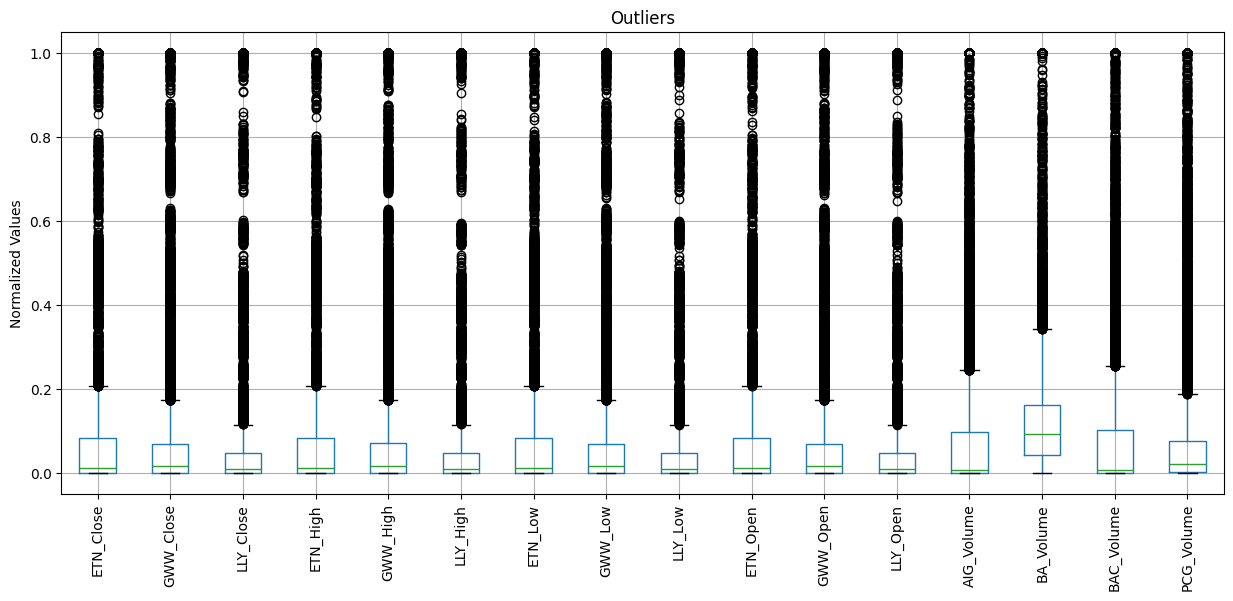

In [31]:
# Visualizing all outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
stock_data_norm.boxplot(rot=90)
plt.title("Outliers")
plt.ylabel("Normalized Values")
plt.show()

The plot showed many outlers, but to get a better idea of how many outliers were present, we again computed the percentage of values which were likely to be outliers

In [32]:
# checking % of values which are outliers in these cols:
# Dictionary to store % of outliers per column
outlier_percent = {}

for col in cols_with_outliers_list:
    Q1 = stock_data[col].quantile(0.25)
    Q3 = stock_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Boolean mask for outliers
    outliers = (stock_data[col] < Q1 - 1.5*IQR) | (stock_data[col] > Q3 + 1.5*IQR)
    
    # % of outliers
    outlier_percent[col] = 100 * outliers.sum() / len(stock_data[col])

# Convert to DataFrame for easy viewing
import pandas as pd
outlier_percent_df = pd.DataFrame.from_dict(outlier_percent, orient='index', columns=['%_outliers'])
outlier_percent_df.sort_values('%_outliers', ascending=False)

,%_outliers
GWW_Close,19.001072
GWW_Low,18.988459
GWW_Open,18.956928
GWW_High,18.944315
AIG_Volume,12.291102
ETN_Low,11.799205
ETN_Close,11.780286
ETN_High,11.748754
ETN_Open,11.742448
BAC_Volume,11.319922


Finally, we made a decision to not exclude the outliers, instead create a new 'flag' variable to flag a possible outlier. This was done because outliers here are possible in different scenarios (ex: peak sales or crashing of the company stock etc). We plan to perform our analysis with and without the outliers to check if there is a difference in the model performance.
And these outliers are also possible evidence of our problem statement, ie impact of executive calls on the market

In [33]:
# Investigate nature of values in each column to see where outliers are justified:
    # ex: peak sales at one time can be a justifyable outlier.
# Finally, decision made to retain outliers and flag them, so that we can see the impact on model with and without including them
# because this could actually be evidence of executive call impact

Q1 = stock_data.quantile(0.25)
Q3 = stock_data.quantile(0.75)
IQR = Q3 - Q1

for col in stock_data.select_dtypes(include=np.number).columns:
    clean_name = col.split('_')[-1]
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    
    # 0 = Not Outlier, 1 = Outlier
    stock_data[f"{clean_name}_outlier"] = ((stock_data[col] < lower_bound) | (stock_data[col] > upper_bound)).astype(int)

/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/2817787978.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f"{clean_name}_outlier"] = ((stock_data[col] < lower_bound) | (stock_data[col] > upper_bound)).astype(int)
/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc0000gn/T/ipykernel_44209/2817787978.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f"{clean_name}_outlier"] = ((stock_data[col] < lower_bound) | (stock_data[col] > upper_bound)).astype(int)
/var/folders/0m/w_dq1r6j7xqcpnyt3g3r9grc

In [34]:
stock_data

,AEP_Close,AIG_Close,APOG_Close,AVT_Close,AVY_Close,AXP_Close,BA_Close,BAC_Close,BALL_Close,BDX_Close,...,WMT_Volume,WRB_Volume,WY_Volume,XEL_Volume,XOM_Volume,Close_outlier,High_outlier,Low_outlier,Open_outlier,Volume_outlier
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,0.908271,13.758173,0.105238,1.143445,2.059712,1.23004,0.190931,1.523905,0.128144,1.138080,...,7526400.0,611249.0,116700.0,10000.0,902400.0,0,0,0,0,0
1962-01-03,0.906616,13.758173,0.105238,1.143445,2.059712,1.23004,0.194750,1.523905,0.128144,1.138080,...,7526400.0,611249.0,116700.0,10000.0,1200000.0,0,0,0,0,0
1962-01-04,0.893381,13.758173,0.105238,1.143445,2.059712,1.23004,0.192840,1.523905,0.128144,1.138080,...,7526400.0,611249.0,116700.0,10000.0,1088000.0,0,0,0,0,0
1962-01-05,0.873529,13.758173,0.105238,1.143445,2.059712,1.23004,0.189022,1.523905,0.128144,1.138080,...,7526400.0,611249.0,116700.0,10000.0,1222400.0,0,0,0,0,0
1962-01-08,0.866910,13.758173,0.105238,1.143445,2.059712,1.23004,0.189499,1.523905,0.128144,1.138080,...,7526400.0,611249.0,116700.0,10000.0,1388800.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,89.371342,71.743034,59.866874,49.005259,186.682892,228.33968,177.690002,40.239436,55.091190,224.062469,...,26205400.0,2017900.0,3546700.0,2535600.0,12285100.0,1,1,1,1,0
2024-12-24,89.371342,72.109322,59.866874,49.005259,187.474838,228.33968,179.339996,40.239436,55.526222,224.567108,...,8992400.0,544200.0,1780100.0,943900.0,7807000.0,1,1,1,1,0
2024-12-26,89.371342,72.604301,59.866874,49.005259,187.445145,228.33968,180.380005,40.239436,55.555885,225.724823,...,10994000.0,808700.0,1736500.0,1394900.0,9652400.0,1,1,1,1,0


### Duplicates

In [35]:
stock_data.duplicated()

Date
1962-01-02    False
1962-01-03    False
1962-01-04    False
1962-01-05    False
1962-01-08    False
              ...  
2024-12-23    False
2024-12-24    False
2024-12-26    False
2024-12-27    False
2024-12-30    False
Length: 15857, dtype: bool

In [36]:
# Check for duplicate rows
duplicates = stock_data.duplicated()  # Returns a boolean Series

# Count how many are duplicates (True)
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [37]:
stock_data.head(10)

,AEP_Close,AIG_Close,APOG_Close,AVT_Close,AVY_Close,AXP_Close,BA_Close,BAC_Close,BALL_Close,BDX_Close,...,WMT_Volume,WRB_Volume,WY_Volume,XEL_Volume,XOM_Volume,Close_outlier,High_outlier,Low_outlier,Open_outlier,Volume_outlier
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,0.908271,13.758173,0.105238,1.143445,2.059712,1.23004,0.190931,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,902400.0,0,0,0,0,0
1962-01-03,0.906616,13.758173,0.105238,1.143445,2.059712,1.23004,0.194750,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,1200000.0,0,0,0,0,0
1962-01-04,0.893381,13.758173,0.105238,1.143445,2.059712,1.23004,0.192840,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,1088000.0,0,0,0,0,0
1962-01-05,0.873529,13.758173,0.105238,1.143445,2.059712,1.23004,0.189022,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,1222400.0,0,0,0,0,0
1962-01-08,0.866910,13.758173,0.105238,1.143445,2.059712,1.23004,0.189499,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,1388800.0,0,0,0,0,0
1962-01-09,0.860293,13.758173,0.105238,1.143445,2.059712,1.23004,0.189976,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,1065600.0,0,0,0,0,0
1962-01-10,0.873529,13.758173,0.105238,1.143445,2.059712,1.23004,0.189976,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,828800.0,0,0,0,0,0
1962-01-11,0.871875,13.758173,0.105238,1.143445,2.059712,1.23004,0.191885,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,617600.0,0,0,0,0,0
1962-01-12,0.885109,13.758173,0.105238,1.143445,2.059712,1.23004,0.197136,1.523905,0.128144,1.13808,...,7526400.0,611249.0,116700.0,10000.0,1398400.0,0,0,0,0,0


There were no duplicate values in our dataset.

## Data Preprocessing: STRUX Data

In [38]:
df_full

,ticker,date,participants,prepared_remarks,questions_and_answers
0,CTAS,2020-09-23,"[{'description': 'Vice President, Treasurer & ...","[{'name': 'Operator', 'speech': ['Good day eve...","[{'name': 'Operator', 'speech': ['[Operator In..."
1,CTAS,2021-03-17,[{'description': 'Vice President-Treasurer and...,"[{'name': 'Operator', 'speech': ['Good day, ev...","[{'name': 'Operator', 'speech': ['Thank you, s..."
2,CTAS,2021-07-15,"[{'description': 'Vice President, Treasurer an...","[{'name': 'Operator', 'speech': ['Good day eve...","[{'name': 'Operator', 'speech': ['[Operator In..."
3,CTAS,2018-03-22,"[{'description': '-Senior Vice President, Fina...","[{'name': 'Operator', 'speech': ['Good day, ev...","[{'name': 'Operator', 'speech': ['Thank you. [..."
4,CTAS,2019-12-17,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Good day, we...","[{'name': 'Operator', 'speech': ['[Operator In..."
...,...,...,...,...,...
11406,CVLG,2022-07-26,"[{'description': 'President', 'name': 'Joey Ho...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in..."
11407,CVLG,2019-04-26,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['Thank you. A..."
11408,CVLG,2019-01-24,[{'description': 'Executive Vice President and...,"[{'name': 'Operator', 'speech': ['Excuse me, e...","[{'name': 'Operator', 'speech': ['Thank you. A..."
11409,CVLG,2022-01-27,[{'description': 'Co-President and Chief Admin...,"[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in..."


The participants for each call included people from 3 categories: Executives, Analysts and Other. We checked the top 50 roles and get an idea of the distribution of the participants

In [40]:
strux = df_full

In [41]:
# Extract unique roles/titles
all_roles = []
for p_list in strux['participants']:
    for p in p_list:
        if 'description' in p:
            all_roles.append(p['description'])

unique_roles = pd.Series(all_roles).value_counts()
unique_roles.head(50)  # View top 50 roles

Chief Financial Officer                                 5092
Morgan Stanley -- Analyst                               4228
Goldman Sachs -- Analyst                                4091
Bank of America Merrill Lynch -- Analyst                3391
President and Chief Executive Officer                   2956
Jefferies -- Analyst                                    2907
Barclays -- Analyst                                     2888
UBS -- Analyst                                          2849
Chief Executive Officer                                 2613
Credit Suisse -- Analyst                                2566
Evercore ISI -- Analyst                                 2426
Deutsche Bank -- Analyst                                2326
Citi -- Analyst                                         2255
RBC Capital Markets -- Analyst                          2112
J.P. Morgan -- Analyst                                  1955
Wolfe Research -- Analyst                               1861
Wells Fargo Securities -

In [42]:
strux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411 entries, 0 to 11410
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ticker                 11411 non-null  object
 1   date                   11411 non-null  object
 2   participants           11411 non-null  object
 3   prepared_remarks       11411 non-null  object
 4   questions_and_answers  11411 non-null  object
dtypes: object(5)
memory usage: 445.9+ KB


Data types are all 'objects'. This is handled in our file a few cells later

### Missing Values

In [43]:
# Check missing values
print(strux.isna().sum())

# filling missing text with empty string, numeric with forward fill
for col in strux.columns:
    if strux[col].dtype == 'object':
        strux[col] = strux[col].fillna("")
    else:
        strux[col] = strux[col].fillna(method='ffill')

ticker                   0
date                     0
participants             0
prepared_remarks         0
questions_and_answers    0
dtype: int64


### Duplicates

In [44]:
# checking duplicates using ticker + date
print("Number of duplicates:", strux.duplicated(subset=["ticker", "date"]).sum())
strux = strux.drop_duplicates(subset=["ticker", "date"])

Number of duplicates: 0


### Datatype Conversion

In [45]:
strux['date'] = pd.to_datetime(strux['date'])
strux = strux.sort_values(['ticker','date']).reset_index(drop=True)
strux['ticker'] = strux['ticker'].astype("string")

In [46]:
strux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411 entries, 0 to 11410
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ticker                 11411 non-null  string        
 1   date                   11411 non-null  datetime64[ns]
 2   participants           11411 non-null  object        
 3   prepared_remarks       11411 non-null  object        
 4   questions_and_answers  11411 non-null  object        
dtypes: datetime64[ns](1), object(3), string(1)
memory usage: 445.9+ KB


### Understanding the dataset:

Since our focus is on executive tone, for each row, we extracted the name and designation of those people who were <b>not Analysts</b>. This included Executives and Others. We decided to include 'Others' as well, because on random inspection, we found important titles like 'Head of Investment Operations' and other important titles who may have a impact in the stock market.
<br /> This data was then appended to each row, under a new column called 'Executives'

In [47]:
def get_executives(participant_list):
    executives = []
    for p in participant_list:
        if 'Analyst' not in p.get('description',''):
            executives.append({'name': p.get('name'), 'designation': p.get('description')})
    return executives

strux['executives'] = strux['participants'].apply(get_executives)

In [48]:
strux

,ticker,date,participants,prepared_remarks,questions_and_answers,executives
0,A,2018-02-14,[{'description': '- Vice President of Investor...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['Certainly. L...","[{'name': 'Alicia Rodriguez', 'designation': '..."
1,A,2018-05-14,[{'description': 'President and Chief Executiv...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Alicia Rodriguez', 'speech': ['Than...","[{'name': 'Mike McMullen', 'designation': 'Pre..."
2,A,2018-08-14,[{'description': 'Vice President of Investor R...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['My pleasure,...","[{'name': 'Alicia Rodriguez', 'designation': '..."
3,A,2018-11-19,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['Of course. (...","[{'name': 'Alicia Rodriguez', 'designation': '..."
4,A,2019-02-20,"[{'description': '-Vice President, Investor Re...","[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Ankur Dhingra', 'speech': ['Thank y...","[{'name': 'Ankur Dhingra', 'designation': '-Vi..."
...,...,...,...,...,...,...
11406,ZTS,2023-08-08,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in...","[{'name': 'Steve Frank', 'designation': 'Vice ..."
11407,ZTS,2023-11-02,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['Certainly. [...","[{'name': 'Steve Frank', 'designation': 'Vice ..."
11408,ZTS,2024-02-13,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['Thank you [O...","[{'name': 'Steve Frank', 'designation': 'Vice ..."
11409,ZTS,2024-05-02,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in...","[{'name': 'Steve Frank', 'designation': 'Vice ..."


Each row had complete data of one earnings call session of one company on one day. This included the panelist speeches (prepared remarks) and question and answer session transcripts as well (questions_and_answers).
These were our findings:<br />
- All questions are asked by analysts.<br />
- All answers are given by the executives<br />
- An operator who moderates the session (ex: Next question is by xyz from abc company. You may proceed)<br />
- Only one analyst asks a question at a time per block.<br />
- One or more executives may answer the same question by the analyst.<br />

<b>We define a block here as a set of Q and A dialogues between two operator speeches.<br /> </b>
We found that the operator only addresses the rules at the beginning of the session, informs the panelists about the next analyst to ask their question, and concludes the session. So the set of dialogues between two 'Next question is by xyz from abc company. You may proceed' dialogues from the operator would be a Q and A block of the previous analyst<br />
Example:<br />

Operator:  Next question is by xyz from abc company. You may proceed<br />
xyz: \<asks question\><br />
executives (one or more): answer them<br />
xyz: \<asks follow up question\><br />
executives (one or more): answer them<br />
....

Operator:  Next question is by pqr from mno company. You may proceed<br />

On further exploration of the questions_and_answers column, we found that each session had multiple Q and A 'threads' in some of the blocks.< br/>
A normal Q and A block is an analyst asking the question and one or more executives answering them. 
We describe a 'thread' as a series of Q and A where analysts ask a question, one or more executives answer them, and follow up questions are asked.

So, to separate the questions and answers into two different columns for ease in computation, we extract the indices of all Operator dialogues in the q and a column for each row, this gives us the 'markers' on where to separate them.

In [49]:
def find_question_indices(qna_list):
    indices = []
    for i, qa in enumerate(qna_list):
        if qa['name'] == 'Operator':
            indices.append(i)
    return indices

strux['operator_indices'] = strux['questions_and_answers'].apply(find_question_indices)

In [50]:
strux

,ticker,date,participants,prepared_remarks,questions_and_answers,executives,operator_indices
0,A,2018-02-14,[{'description': '- Vice President of Investor...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['Certainly. L...","[{'name': 'Alicia Rodriguez', 'designation': '...","[0, 9, 17, 27, 29, 36, 46, 54, 74, 80, 92, 103..."
1,A,2018-05-14,[{'description': 'President and Chief Executiv...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Alicia Rodriguez', 'speech': ['Than...","[{'name': 'Mike McMullen', 'designation': 'Pre...","[1, 11, 22, 35, 50, 58, 68, 85, 99, 105, 117, ..."
2,A,2018-08-14,[{'description': 'Vice President of Investor R...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['My pleasure,...","[{'name': 'Alicia Rodriguez', 'designation': '...","[0, 13, 25, 36, 48, 58, 67, 82, 88, 99, 111, 1..."
3,A,2018-11-19,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['Of course. (...","[{'name': 'Alicia Rodriguez', 'designation': '...","[0, 11, 21, 33, 49, 60, 69, 85, 93, 106, 114, ..."
4,A,2019-02-20,"[{'description': '-Vice President, Investor Re...","[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Ankur Dhingra', 'speech': ['Thank y...","[{'name': 'Ankur Dhingra', 'designation': '-Vi...","[1, 11, 28, 36, 46, 54, 67, 79, 90, 104, 117, ..."
...,...,...,...,...,...,...,...
11406,ZTS,2023-08-08,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 4, 7, 11, 15, 18, 22, 25, 30, 33, 35]"
11407,ZTS,2023-11-02,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['Certainly. [...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 4, 8, 12, 17, 21, 24, 28, 32, 35, 37, 39]"
11408,ZTS,2024-02-13,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['Thank you [O...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 4, 8, 11, 15, 19, 23, 27, 30, 34, 38, 40]"
11409,ZTS,2024-05-02,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 3, 7, 12, 15, 20, 23, 26, 30, 34, 39, 42, 44]"


The original dataset has the name of the analysts and their questions. The analyst name wasn't relevant for our analysis, hence their names were dropped and only the questions were stored in the questions column. <br />
The answers had the executives names before them, the names as such weren't important in our analysis, so we mapped the name from the answers to the participant list and got the designation of the executives, this was then used as the 'key' in a dictionary where the values were the answers of the respective executive

In [51]:
# Creating a dictionary for each row mapping executive name -> designation
def get_executive_map(participants):
    return {p["name"]: p["description"] 
            for p in participants if p["position"] == "Executive"}

In [52]:
def process_qa(row):
    exec_map = get_executive_map(row["participants"])
    
    questions = []       # list of all questions (strings)
    answers = []         # list of dicts {designation: answer}
    current_question = []
    
    for block in row["questions_and_answers"]:
        speaker = block["name"]
        speech = " ".join(block["speech"]).strip()
        
        if speaker == "Operator":
            if current_question:
                # save current thread as a question
                questions.append(" ".join(current_question))
                current_question = []
            continue
        
        if speaker not in exec_map:
            # Analyst question
            current_question.append(speech)
        else:
            # Executive answer
            answers.append({exec_map[speaker]: speech})
    
    # In case last question exists
    if current_question:
        questions.append(" ".join(current_question))
    
    return pd.Series({
        "questions": questions,
        "answers": answers
    })

# Applying to our dataframe
strux[["questions", "answers"]] = strux.apply(process_qa, axis=1)

In [53]:
strux

,ticker,date,participants,prepared_remarks,questions_and_answers,executives,operator_indices,questions,answers
0,A,2018-02-14,[{'description': '- Vice President of Investor...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['Certainly. L...","[{'name': 'Alicia Rodriguez', 'designation': '...","[0, 9, 17, 27, 29, 36, 46, 54, 74, 80, 92, 103...","[Hi, happy Valentine's Day, guys, and congrats...",[{'- President and Chief Executive Officer': '...
1,A,2018-05-14,[{'description': 'President and Chief Executiv...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Alicia Rodriguez', 'speech': ['Than...","[{'name': 'Mike McMullen', 'designation': 'Pre...","[1, 11, 22, 35, 50, 58, 68, 85, 99, 105, 117, ...","[Hi, good afternoon. The operating margin guid...",[{'Vice President of Investor Relations': 'Tha...
2,A,2018-08-14,[{'description': 'Vice President of Investor R...,"[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['My pleasure,...","[{'name': 'Alicia Rodriguez', 'designation': '...","[0, 13, 25, 36, 48, 58, 67, 82, 88, 99, 111, 1...","[Hi, guys. Thanks for all the help here and th...",[{'Senior Vice President and Chief Financial O...
3,A,2018-11-19,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Operator', 'speech': ['Of course. (...","[{'name': 'Alicia Rodriguez', 'designation': '...","[0, 11, 21, 33, 49, 60, 69, 85, 93, 106, 114, ...",[Thanks. I'll be the first to congratulate Ali...,"[{'Senior Vice President, Chief Financial Offi..."
4,A,2019-02-20,"[{'description': '-Vice President, Investor Re...","[{'name': 'Operator', 'speech': ['Good day, la...","[{'name': 'Ankur Dhingra', 'speech': ['Thank y...","[{'name': 'Ankur Dhingra', 'designation': '-Vi...","[1, 11, 28, 36, 46, 54, 67, 79, 90, 104, 117, ...","[Great. Thanks, guys. Maybe just to start -- [...","[{'-Vice President, Investor Relations -- Vice..."
...,...,...,...,...,...,...,...,...,...
11406,ZTS,2023-08-08,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 4, 7, 11, 15, 18, 22, 25, 30, 33, 35]",[Great. Thanks for taking the question and con...,"[{'Chief Executive Officer': 'Sure. Thanks, Mi..."
11407,ZTS,2023-11-02,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['Certainly. [...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 4, 8, 12, 17, 21, 24, 28, 32, 35, 37, 39]",[Great. Thanks guys. Good morning. I promise o...,"[{'Chief Executive Officer': 'Wow. OK. So, Joh..."
11408,ZTS,2024-02-13,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['Thank you [O...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 4, 8, 11, 15, 19, 23, 27, 30, 34, 38, 40]",[Great. Thanks for taking my questions. So can...,"[{'Chief Executive Officer': 'Thank you, Erin...."
11409,ZTS,2024-05-02,"[{'description': 'Vice President, Investor Rel...","[{'name': 'Operator', 'speech': ['Welcome to t...","[{'name': 'Operator', 'speech': ['[Operator in...","[{'name': 'Steve Frank', 'designation': 'Vice ...","[0, 3, 7, 12, 15, 20, 23, 26, 30, 34, 39, 42, 44]","[Great Thanks for taking the question. First, ...",[{'Chief Financial Officer': 'I'll be happy to...


After all these steps, a sample of how a datapoint (row) looks like is given below:

In [54]:
pd.set_option('display.max_colwidth', None)

# View the full row by index
print(strux.iloc[0])

ticker                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Saving our processed files:

In [55]:
strux.to_pickle('strux_processed.pkl')
stock_data.to_pickle('stock_processed.pkl')